In [1]:
import numpy as np 
import matplotlib.pyplot as plt

from frank.geometry import SourceGeometry
from frank.io import load_uvtable
from frank.radial_fitters import FrankFitter, FourierBesselFitter

In [2]:
# Data source AS209 1mm visibilities gridded

rad_to_arcsec = 3600 * 180 / np.pi

# Huang 2018 
inc = 34.97
pa = 85.76
dra = 1.9e-3
ddec = -2.5e-3
r_out = 1.9

# Frank Parameters
N = 25

# UVtable AS209 at 1mm.
dir = "../data/"
data_file = dir +'AS209_continuum_prom_1chan_30s_keepflagsFalse_gridded.txt'

 # load data
u, v, Vis, Weights = np.loadtxt(data_file, unpack = True)

geom = SourceGeometry(inc= inc, PA= pa, dRA= dra, dDec= ddec)

In [3]:
#FF = FrankFitter(1.9, 300, geom, alpha = alpha, weights_smooth = w_smooth)
import time
start_time = time.time()
FF = FourierBesselFitter(r_out, N, geom)
sol_new = FF.fit(u, v, Vis, Weights)
print("--- %s minutes ---" % (time.time()/60 - start_time/60))

--- 1.0607250668108463 minutes ---


In [4]:
len(sol_new.mean) # we corroborate the desire output has 25x25 points.

625

In [5]:
dx = dy =  2*r_out/(N**2*rad_to_arcsec)

In [6]:
I = sol_new.mean.real/(dx*dy)

In [7]:
def reshape(array, N):
    matrix = np.zeros((N, N), dtype=array.dtype)

    # Fill the matrix from bottom to top by columns
    for i in range(N):
        matrix[:, i] = array[i * N:(i + 1) * N][::-1]
    return matrix

In [8]:
I_reshape = reshape(I, N)

<Figure size 1500x1500 with 0 Axes>

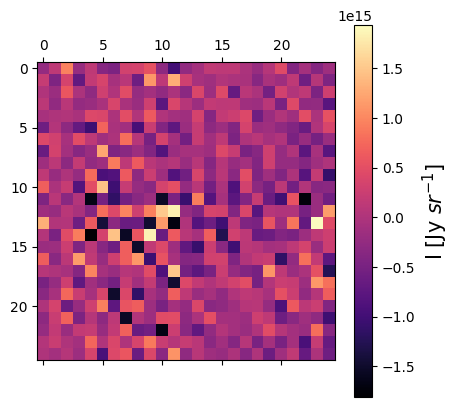

In [9]:
plt.figure(figsize=(15, 15))
plt.matshow(I_reshape, cmap="magma")
cmap = plt.colorbar()
cmap.set_label(r'I [Jy $sr^{-1}$]', size = 15)
plt.show()